# RANDOM FOREST (RF)

Author: @angeladominguezgil

For the link, click [here](https://github.com/angeladominguezgil/Hypercholesterolemia)

* The RF model was developed with the **Scikit-Learn library** in Python. 
* The RF hyperparameter tuning was performed by the **GridSearchCV class**.

In [ ]:
#Import functions needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score 
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.lines import Line2D



In [2]:
#Current directory
os.getcwd()
#Change working directory
os.chdir('C:\\Users\\Administrador\\Desktop\\python')
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'graficos',
 'Graphics.ipynb',
 'heatmap data',
 'heatmap for python.xlsx',
 'heatmap.ipynb',
 'Model_6800 pairs of DNA.ipynb',
 'model_DecisionTreeClassifier.ipynb',
 'model_hypercholesterolemia-checkpoint.ipynb',
 'model_LDA.ipynb',
 'model_RandomForest.ipynb']

In [3]:
#Loading data: 
pd.read_csv("data.csv", sep=";")
data = pd.read_csv("data.csv",sep=";")
data.head(10) #Shows 10 first rows from de dataset

,n,f(vij/c0)obj,Subset,f(c0)ref,D3(Set1),V2(Set1),D3(Set2),V1(Set2),D3(Set3),D1(Set4)
0,1,0,t,0.325301,2.515821,0.24,3.37,0.1,3.03,58.64
1,2,0,t,0.325301,2.475821,0.24,3.33,0.1,2.99,120.59
2,3,0,t,0.325301,2.475821,-1.01,3.33,0.1,2.99,115.82
3,4,0,v,0.325301,1.735821,0.24,2.59,0.1,2.25,7.90
4,5,0,t,0.325301,0.955821,0.24,1.81,0.1,1.47,2.53
5,6,0,t,0.325301,0.805821,0.24,1.66,0.1,1.32,-20.15
6,7,0,t,0.325301,0.175821,0.24,1.03,0.1,0.69,-25.52
7,8,0,v,0.325301,-0.194179,-1.01,0.66,0.1,0.32,24.49
8,9,0,t,0.325301,-0.194179,0.24,0.66,0.1,0.32,24.49
9,10,0,t,0.325301,-0.604179,0.24,0.25,0.1,-0.09,-53.58


In [4]:
#Data Splitting:
Y= data.iloc[:,1]
X = data.iloc[:, 3:]
print(Y) 
print(X)

0         0
1         0
2         0
3         0
4         0
         ..
369253    0
369254    0
369255    0
369256    0
369257    0
Name: f(vij/c0)obj, Length: 369258, dtype: int64
        f(c0)ref  D3(Set1)  V2(Set1)  D3(Set2)  V1(Set2)  D3(Set3)  D1(Set4)
0       0.325301  2.515821      0.24      3.37       0.1      3.03     58.64
1       0.325301  2.475821      0.24      3.33       0.1      2.99    120.59
2       0.325301  2.475821     -1.01      3.33       0.1      2.99    115.82
3       0.325301  1.735821      0.24      2.59       0.1      2.25      7.90
4       0.325301  0.955821      0.24      1.81       0.1      1.47      2.53
...          ...       ...       ...       ...       ...       ...       ...
369253  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369254  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369255  0.000000 -2.209286     -0.07     -1.82       0.1     -1.74    -61.52
369256  0.000000 -2.209286     -0.07     -1.82   

In [5]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["Subset"] == "t"]
pred_data = data[data["Subset"] == "v"]

#Model Preparation for Random Forest:
X_train_forest= train_data.iloc[:, 3:]
X_test_forest = pred_data.iloc[:, 3:]
y_train_forest= train_data.iloc[:, 1]
y_test_forest= pred_data.iloc[:, 1]

print(X_test_forest.shape)
print(X_train_forest.shape)
print(y_test_forest.shape)
print(y_train_forest.shape)

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [6]:
#RANDOM FOREST MODEL
#X_forest
mlr_X_train_forest= X_train_forest[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_forest = X_test_forest[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

#Define prior probabilities and adjust as needed
class_weight = {0:0.5,1:0.5}
# Define the random forest model
seed = 44
rf_model = RandomForestClassifier(random_state=seed, class_weight='balanced', bootstrap=True) 

The **hyperparamter tuning** starts here. The best combination of hyperparameters is evaluated by cross-validation. 

You can try different cominations by changing the following:

* n_estimators: [100, 200, 500]
* criterion: ['gini', 'entropy', 'log_loss']
* max_depth: [None, 10, 20,...]
* min_samples_split:[2,10,50,...]
* min_samples_leaf: [10,20,50,...]

For extra info about more hyperparameters click [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [7]:
#Define the hyperparameter search space
param_grid = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2769],
    'min_samples_leaf': [1384]
}

# Perform hyperparameter search by cross-validation
grid_search_forest = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit model
grid_search_forest.fit(mlr_X_train_forest, y_train_forest)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=44),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1384],
                         'min_samples_split': [2769], 'n_estimators': [50]},
             scoring='accuracy')

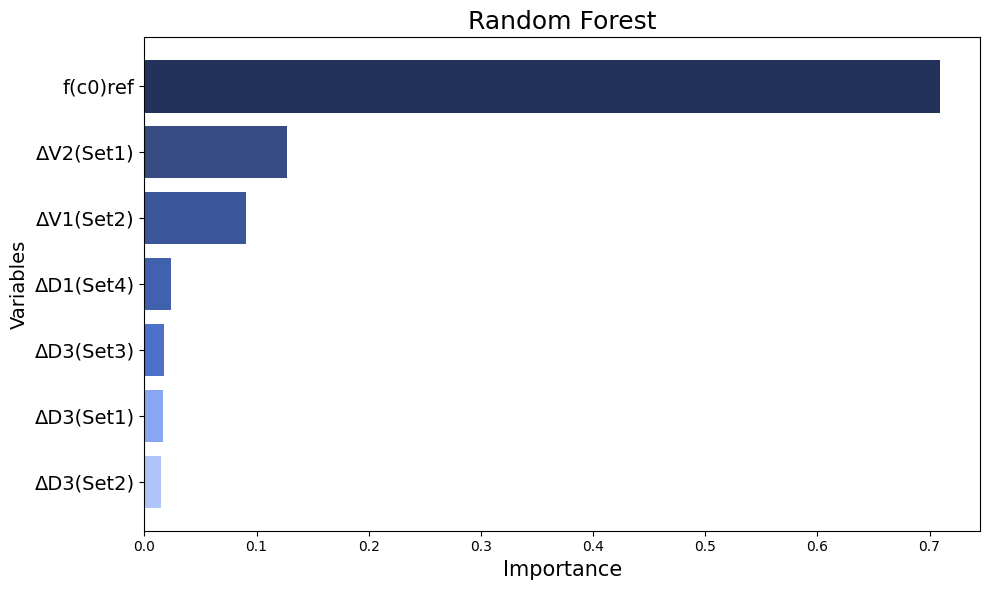

In [11]:

#Horizontal graphic for importance of variables
import matplotlib.colors as mcolors

best_rf_model = grid_search_forest.best_estimator_

importances = best_rf_model.feature_importances_
feature_names = ['f(c0)ref', 'ΔD3(Set1)', 'ΔV2(Set1)', 'ΔD3(Set2)', 'ΔV1(Set2)', 'ΔD3(Set3)',
       'ΔD1(Set4)']

import numpy as np
import matplotlib.pyplot as plt

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Random Forest", fontsize=18)
plt.barh(range(len(importances)), importances[indices],
          color=["#22325a","#354b82","#3b569a","#4160ae",'#4d71cb',"#89a6f0","#afc4f8"],align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices], fontsize=14)
plt.xlabel("Importance", fontsize=15)
plt.ylabel("Variables",fontsize=14)
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()



In [12]:
# Print the best hyperparameters 
best_params = grid_search_forest.best_params_
print("best hyperparameters :", best_params)

best hyperparameters : {'max_depth': None, 'min_samples_leaf': 1384, 'min_samples_split': 2769, 'n_estimators': 50}


In [13]:
#make predictions on the train set
y_pred_train_forest = grid_search_forest.predict(mlr_X_train_forest)

In [14]:
#calculate confusion matrix
cm_train_forest = confusion_matrix(y_train_forest, y_pred_train_forest)
print(cm_train_forest)

#calculate performance metrics
tn_train_forest, fp_train_forest, fn_train_forest, tp_train_forest = cm_train_forest.ravel()

specificity_train_forest = tn_train_forest / (tn_train_forest + fp_train_forest)
sensitivity_train_forest = tp_train_forest / (tp_train_forest + fn_train_forest)
accuracy_train_forest = (tp_train_forest + tn_train_forest) / (tp_train_forest + tn_train_forest + fp_train_forest + fn_train_forest)
false_positive_train_forest = fp_train_forest / (fp_train_forest + tn_train_forest)
print('Specificity:',specificity_train_forest,'\n', 'Sensitivity:', sensitivity_train_forest,'\n','Accuracy:', accuracy_train_forest)
mcc_train_forest = matthews_corrcoef(y_train_forest, y_pred_train_forest)
print(mcc_train_forest)

[[ 67409  25449]
 [ 46498 137588]]
Specificity: 0.7259363759719141 
 Sensitivity: 0.7474115359125626 
 Accuracy: 0.7402110173897972
0.45413211408730686


In [15]:
#make predictions on the test set
y_pred_test_forest = grid_search_forest.predict(mlr_X_test_forest)

In [16]:
#calculate confusion matrix
cm_test_forest = confusion_matrix(y_test_forest, y_pred_test_forest)
print(cm_train_forest)

#calculate performance metrics
tn_test_forest, fp_test_forest, fn_test_forest, tp_test_forest = cm_test_forest.ravel()

specificity_test_forest = tn_test_forest / (tn_test_forest + fp_test_forest)
sensitivity_test_forest = tp_test_forest / (tp_test_forest + fn_test_forest)
accuracy_test_forest = (tp_test_forest + tn_test_forest) / (tp_test_forest + tn_test_forest + fp_test_forest + fn_test_forest)
false_positive_test_forest = fp_test_forest / (fp_test_forest + tn_test_forest)
print('Specificity:',specificity_test_forest,'\n', 'Sensitivity:', sensitivity_test_forest,'\n','Accuracy:', accuracy_test_forest)
mcc_test_forest = matthews_corrcoef(y_test_forest, y_pred_test_forest)
print(mcc_test_forest)

[[ 67409  25449]
 [ 46498 137588]]
Specificity: 0.7258830753320622 
 Sensitivity: 0.747323654494794 
 Accuracy: 0.7401369239768616
0.45396363866866324


In [17]:
# Print all hyperparameters, including internal hyperparameters
all_params = grid_search_forest.best_estimator_.get_params()
print("\nTodos los hiperparámetros:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


Todos los hiperparámetros:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1384
min_samples_split: 2769
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 50
n_jobs: None
oob_score: False
random_state: 44
verbose: 0
warm_start: False


In [18]:

#Get the most deep tree
best_model=grid_search_forest.best_estimator_
dephts = [tree.tree_.max_depth for tree in best_model.estimators_]
max_depht = max(dephts)
print(f"Profundidad máxima alcanzada por los árboles: {max_depht}")

Profundidad máxima alcanzada por los árboles: 17
